In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

<Figure size 500x500 with 0 Axes>

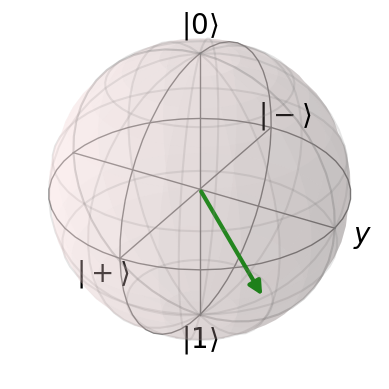

In [34]:
# Define quantum state
n = 1
state = qt.rand_ket(2 ** n)
# Set up Bloch sphere
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sphere = qt.Bloch(axes=ax)

# Set custom labels for the axes
sphere.xlabel = ['$|+\\rangle$', '$|-\\rangle$']
sphere.zlabel = ['$|0\\rangle$', '$|1\\rangle$']

# Rotate the Bloch sphere (Try different azimuthal angles)
sphere.view = [0, 50]  # Adjust the 110 (azimuthal angle) as needed

# Add state and display
sphere.add_states(state)
sphere.show()


In [30]:
b = qt.Bloch()
b3d = qt.Bloch3d()

Exception: This function requires the mayavi module.

In [8]:

def qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist):
    # operators and the hamiltonian
    sx = qt.sigmax()
    sy = qt.sigmay()
    sz = qt.sigmaz()
    sm = qt.sigmam()
    H = w * (np.cos(theta) * sz + np.sin(theta) * sx)
    # collapse operators
    c_op_list = []
    n_th = 0.5 # temperature
    rate = gamma1 * (n_th + 1)
    if rate > 0.0: c_op_list.append(np.sqrt(rate) * sm)
    rate = gamma1 * n_th
    if rate > 0.0: c_op_list.append(np.sqrt(rate) * sm.dag())
    rate = gamma2
    if rate > 0.0: c_op_list.append(np.sqrt(rate) * sz)
    # evolve and calculate expectation values
    output = qt.mesolve(H, psi0, tlist, c_op_list, [sx, sy, sz])
    return output.expect[0], output.expect[1], output.expect[2]

## calculate the dynamics
w     = 1.0 * 2 * np.pi  # qubit angular frequency
theta = 0.2 * np.pi      # qubit angle from sigma_z axis (toward sigma_x axis)
gamma1 = 0.5             # qubit relaxation rate
gamma2 = 0.2             # qubit dephasing rate
# initial state
a = 1.0
psi0 = (a*qt.basis(2, 0) + (1-a)*qt.basis(2, 1))/np.sqrt(a**2 + (1-a)**2)
tlist = np.linspace(0, 4, 250)
#expectation values for ploting
sx, sy, sz = qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist)


AttributeError: 'numpy.ndarray' object has no attribute 'show'

In [10]:
import numpy as np
b = qt.Bloch()
b.vector_color = ['r']
b.view = [-40, 30]
for i in range(len(sx)):
    b.clear()
    b.add_vectors([np.sin(theta), 0, np.cos(theta)])
    b.add_points([sx[:i+1], sy[:i+1], sz[:i+1]])
    b.save(dirc='temp')  # saving images to temp directory in current working directory

In [11]:
from matplotlib import pyplot, animation
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig, azim=-40, elev=30)
sphere = qt.Bloch(axes=ax)

def animate(i):
   sphere.clear()
   sphere.add_vectors([np.sin(theta), 0, np.cos(theta)])
   sphere.add_points([sx[:i+1], sy[:i+1], sz[:i+1]])
   sphere.make_sphere()
   return ax

def init():
   sphere.vector_color = ['r']
   return ax

ani = animation.FuncAnimation(fig, animate, np.arange(len(sx)),
                              init_func=init, blit=False, repeat=False)
ani.save('bloch_sphere.mp4', fps=20)

<Figure size 640x480 with 0 Axes>